# Team 1 - CAP5619 Project
#### Marco Bogani, Sulaiman Karmali, Daman Sawhney, Ivan Lima

## Define the problem:

Considering the economic climate from 2022 to today, one of the most apparent changes that took place was car prices and sales. Dealerships continuously face the challenges, of optimizing sales strategies to cater to a multitude of diverse demographics and preferences. Our study aims to leverage our car sales dataset to predict future car sales trends, partition customers based on their purchase behavior, and determine the best pricing strategy for different car models. By applying regression models for sales forecasting, clustering techniques for customer segmentation, and machine learning algorithms for price optimization, this analysis aims to discover patterns and insights that can inform targeted marketing campaigns and efficient inventory management. Thus the overall goal is to enable dealerships to better understand their customers' preferences, better adjust to market climate changes, and ultimately improve both sales performance and customer satisfaction. Moreover, this comprehensive approach will let dealerships gain a competitive edge in the car market by making data-driven decisions that align with customer trends and expectations. 

## Load Libraries:

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

## Load Dataset:

In [29]:
# Load the data
## Change file path to where you have dataset saved

data = pd.read_csv('carSales2.csv') #version '2' is a cut down dataset for faster testing
data.columns
data = data.drop(columns=['Customer Name','Dealer_Name','Phone','Dealer_No ','Car_id', 'Engine'])
data.head(5)

,Date,Gender,Annual Income,Company,Model,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13500,Ford,Expedition,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,Dodge,Durango,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Cadillac,Eldorado,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Toyota,Celica,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Acura,TL,Auto,Red,24500,Hatchback,Janesville


## Summarize Data:

The dataset being worked with is clean when it comes to NaN and NULL values as shown below.

In [30]:
# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# check for na or Null values
isnacount = data.isna().sum()
isnullcount = data.isnull().sum()

# print results
print("DataFrame data types: \n", data.dtypes)
print("NA data counts: \n", isnacount)
print("\nNULL data counts: \n", isnullcount)

DataFrame data types: 
 Date             datetime64[ns]
Gender                   object
Annual Income             int64
Company                  object
Model                    object
Transmission             object
Color                    object
Price ($)                 int64
Body Style               object
Dealer_Region            object
dtype: object
NA data counts: 
 Date             0
Gender           0
Annual Income    0
Company          0
Model            0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64

NULL data counts: 
 Date             0
Gender           0
Annual Income    0
Company          0
Model            0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64


This shape can help understand the complexity of the dataset. It is important to remember the number of columns here as they will change when encoding occurs.

In [31]:
# Get the number of rows and columns
num_rows, num_columns = data.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 3999
Number of columns: 10


Below, column info can be gathered. This is to better understand what data we are working with. This will also prepare us for feature selection.+

In [32]:
# Setup column name variable and empty dictionary
columns = ['Body Style','Model', 'Company', 'Color'] 
unique_values_dict = {}

for column in columns:
    unique_values_dict[column] = data[column].unique().tolist()

# Print the unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"{column}: {unique_values}")

Body Style: ['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan']
Model: ['Expedition', 'Durango', 'Eldorado', 'Celica', 'TL', 'Diamante', 'Corolla', 'Galant', 'Malibu', 'Escort', 'RL', 'Pathfinder', 'Grand Marquis', '323i', 'Sebring Coupe', 'Forester', 'Accent', 'Land Cruiser', 'Accord', '4Runner', 'I30', 'A4', 'Carrera Cabrio', 'Jetta', 'Viper', 'Regal', 'LHS', 'LW', '3000GT', 'SLK230', 'Civic', 'S-Type', 'S40', 'Mountaineer', 'Park Avenue', 'Montero Sport', 'Sentra', 'S80', 'Lumina', 'Bonneville', 'C-Class', 'Altima', 'DeVille', 'Stratus', 'Cougar', 'SW', 'C70', 'SLK', 'Tacoma', 'M-Class', 'A6', 'Intrepid', 'Sienna', 'Eclipse', 'Contour', 'Town car', 'Focus', 'Mustang', 'Cutlass', 'Corvette', 'Impala', 'Cabrio', 'Dakota', '300M', '328i', 'Bravada', 'Maxima', 'Ram Pickup', 'Concorde', 'V70', 'Quest', 'ES300', 'SL-Class', 'Explorer', 'Prizm', 'Camaro', 'Outback', 'Taurus', 'Cavalier', 'GS400', 'Monte Carlo', 'Sonata', 'Sable', 'Metro', 'Voyager', 'Cirrus', 'Avenger', 'Odyssey', 'Intri

Above, it can be seen that the Engine column has a corrupted character and that there are no similar features like 'light blue' or 'dark blue.'

In [33]:
# Change just the engine column to correct typo
data['Model'] = data['Model'].replace('Eldorado', 'El Dorado')


Below is a complete verification of columns and their unique value syntax validation.

In [34]:
# Setup column name variable and empty dictionary
columns = ['Body Style','Color','Transmission','Gender','Price ($)','Model']  # replace with your actual column names
unique_values_dict = {}

for column in columns:
    unique_values_dict[column] = data[column].unique().tolist()

# Print the unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"{column}: {unique_values}")

Body Style: ['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan']
Color: ['Black', 'Red', 'Pale White']
Transmission: ['Auto', 'Manual']
Gender: ['Male', 'Female']
Price ($): [26000, 19000, 31500, 14000, 24500, 12000, 42000, 82000, 15000, 31000, 46000, 9000, 17000, 18000, 33000, 21000, 25000, 22000, 31250, 41000, 13000, 20000, 43000, 16000, 61000, 39000, 42500, 45001, 36001, 21001, 29000, 27000, 25600, 36000, 31100, 22600, 45000, 62000, 22700, 49000, 28000, 22001, 25001, 12800, 22500, 46500, 54000, 16001, 38000, 21200, 71000, 57001, 62001, 69001, 20001, 26750, 24000, 28501, 15500, 12500, 27250, 11000, 26500, 69000, 14150, 60500, 44000, 11650, 11800, 27500, 16900, 14200, 51000, 32000, 39500, 13500, 9250, 29500, 18501, 17001, 23500, 53000, 60750, 24001, 35000, 18500, 21500, 41100, 20200, 59000, 57000, 25500, 19100, 10000, 23000, 11501, 24250, 37000, 54500, 25100, 34000, 21900, 29200, 85000, 43500, 14500, 16500, 85600, 75000, 71500, 61500, 19500, 29001, 60000, 28001, 60001, 22100, 21100, 

## Descriptive Statistics & Data Visualizations:

At this point, only Annual Income and Price are the numerical columns in the dataframe. We can see their quartiles, minimum and maximum values, etc.

In [35]:
dfdesc = data.describe()
dfdesc.round(2)

,Date,Annual Income,Price ($)
count,3999,3999.00,3999.00
mean,2022-04-23 09:38:18.274568448,863130.29,27990.50
min,2022-01-02 00:00:00,13500.00,9000.00
25%,2022-03-19 00:00:00,392000.00,18000.00
50%,2022-04-26 00:00:00,750000.00,22501.00
75%,2022-06-08 00:00:00,1225000.00,34000.00
max,2022-07-16 00:00:00,5800000.00,85600.00
std,NaN,749661.30,14664.73


To better understand underlying correlations which will help us better build the prediction model, we must remove outlier data. In the visualizations below, you can see how removing outliers makes the data more legible and the smaller differences in class trends can be observed.

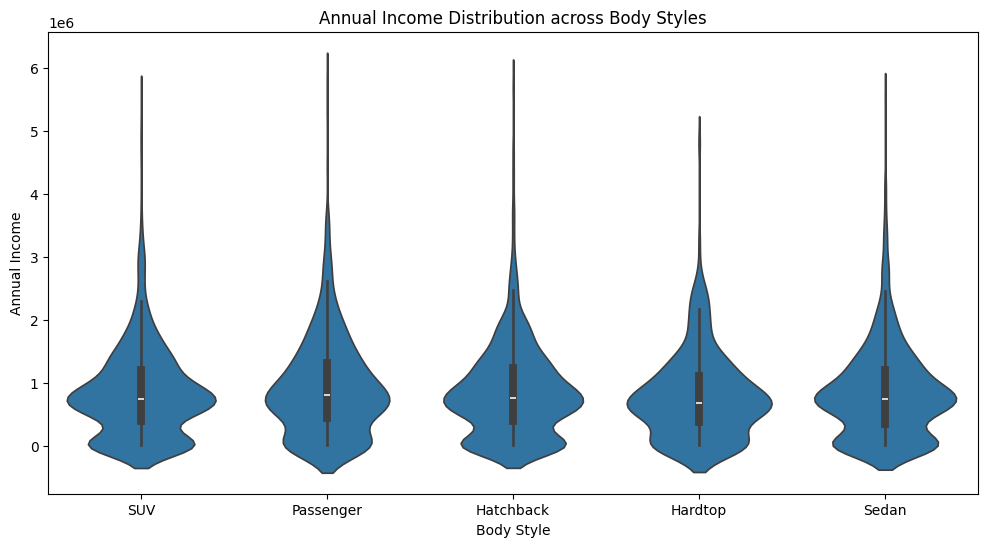

In [36]:
# Visualize with basic dataframe without any preprocessing
plt.figure(figsize=(12, 6))
sns.violinplot(x='Body Style', y='Annual Income', data=data)
plt.title('Annual Income Distribution across Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Annual Income')
plt.show()

Only Annual Income was refined for outliers as that data is primary value that can be uncorrelated to the price of a purchased vehice.

In [20]:
# Calculate the Inter Quartile Range for Annual Income
Q1 = data['Annual Income'].quantile(0.25)
Q3 = data['Annual Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the cutoff for outliers
cutoff = IQR * 1.5

# Determine the bounds for the outliers
lower_bound = Q1 - cutoff
upper_bound = Q3 + cutoff

df_outliers = data[(data['Annual Income'] < lower_bound) | (data['Annual Income'] > upper_bound)]

# Print the outliers
print("Annual Income class outliers:\n", df_outliers['Annual Income'].head(5))

# Filter the dataframe to remove outliers from 'Annual Income'
df = data[(data['Annual Income'] >= lower_bound) & (data['Annual Income'] <= upper_bound)]

# Check if any values in the filtered DataFrame fall outside the bounds
outliers_present = any((data['Annual Income'] < lower_bound) | (data['Annual Income'] > upper_bound))

# Print result and confirm process complete.
if outliers_present:
    print("Outliers were not removed correctly.")
else:
    print("Outliers were removed correctly.")

Annual Income class outliers:
 21     2500000
48     4060000
89     2550000
122    3000000
125    2800000
Name: Annual Income, dtype: int64
Outliers were not removed correctly.


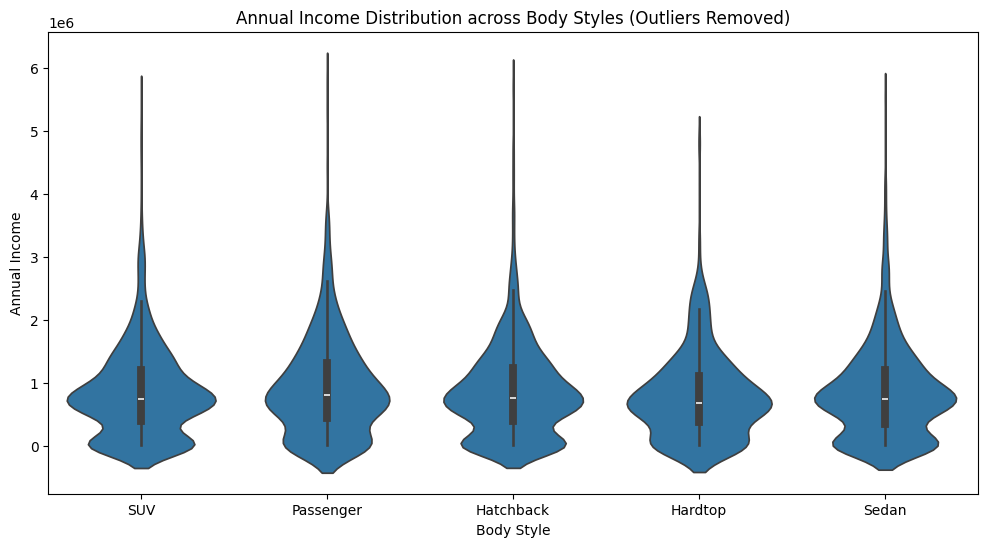

In [21]:
# Now visualized the data without outliers
plt.figure(figsize=(12, 6))
sns.violinplot(x='Body Style', y='Annual Income', data=data)
plt.title('Annual Income Distribution across Body Styles (Outliers Removed)')
plt.xlabel('Body Style')
plt.ylabel('Annual Income')
plt.show()

In this particular context, since the pinching occurs at a similar income level across all body styles, it could indicate a common income value around which fewer people purchase cars, regardless of the body style. This might suggest a market segment that is underserved or has fewer customers.

## Clean & Prepare Data:

Since the dataset ranges over 2 years, the significant trends in an established industry are not intense. As such, it is decided removing date from the data would not have a meaningful impact to the model's performance.

Model was the only class with many features and was label encoded instead to keep our dataset from getting too large.

In [24]:
remappeddf = data.copy()
remappeddf.drop(columns=['Date'], inplace=True)

# Setup the label encoder
le = LabelEncoder()

# Fit and transform the 'Model' column
remappeddf['Model'] = le.fit_transform(remappeddf['Model'])

print(remappeddf.head(5))

  Gender  Annual Income   Company  Model Transmission       Color  Price ($)  \
0   Male          13500      Ford     59         Auto       Black      26000   
1   Male        1480000     Dodge     51         Auto       Black      19000   
2   Male        1035000  Cadillac     55       Manual         Red      31500   
3   Male          13500    Toyota     35       Manual  Pale White      14000   
4   Male        1465000     Acura    140         Auto         Red      24500   

  Body Style Dealer_Region  
0        SUV    Middletown  
1        SUV        Aurora  
2  Passenger    Greenville  
3        SUV         Pasco  
4  Hatchback    Janesville  


## Feature Selection and Data Transformations

Features above have a few classes except Price and model. One Hot encoding will be good for the features which are not Price and Model. For the Model class, a label encoder is used due to the large amount of models. MixMax scaling was applied to Annual income and Price ($) data to make it more normalized.

In [25]:
le = LabelEncoder()

# Fit and transform the 'Model' column
remappeddf['Model'] = le.fit_transform(remappeddf['Model'])


categorical_columns = ['Body Style', 'Dealer_Region', 'Color', 'Transmission', 'Gender']  # Categorical columns
# Keeping only the categorical columns for encoding
remappeddf_categorical = remappeddf[categorical_columns]

encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(remappeddf_categorical).toarray()
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded DataFrame with the rest of the data and exlude the original categorical columns for redundancy sake
df_rest = remappeddf.drop(columns=categorical_columns)
df_combined = pd.concat([df_rest, df_encoded], axis=1)

# Print preview of the combined DataFrame
print(df_combined.head())  

   Annual Income   Company  Model  Price ($)  Body Style_Hardtop  \
0          13500      Ford     59      26000                 0.0   
1        1480000     Dodge     51      19000                 0.0   
2        1035000  Cadillac     55      31500                 0.0   
3          13500    Toyota     35      14000                 0.0   
4        1465000     Acura    140      24500                 0.0   

   Body Style_Hatchback  Body Style_Passenger  Body Style_SUV  \
0                   0.0                   0.0             1.0   
1                   0.0                   0.0             1.0   
2                   0.0                   1.0             0.0   
3                   0.0                   0.0             1.0   
4                   1.0                   0.0             0.0   

   Body Style_Sedan  Dealer_Region_Aurora  ...  Dealer_Region_Middletown  \
0               0.0                   0.0  ...                       1.0   
1               0.0                   1.0  ...  

Below, you can see the number of rows has decreased from data cleaning and the number of columns has increased due to encoding.

In [37]:
# Get the number of rows and columns
num_rows, num_columns = df_combined.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Post processing statistics of the dataset/ dataframe 
print("\nRemapped DataFrame: \n\n", df_combined.describe().round(3))  # This will give you count, mean, std, min, 25%, 50%, 75%, max
print('\nVariance values: \n\n', df_combined.var())  # Variance
print('\nSkew measurement: \n\n',df_combined.skew().round(4))  # Skewness

Number of rows: 3999
Number of columns: 23

Remapped DataFrame: 

        Annual Income     Model  Price ($)  Body Style_Hardtop  \
count       3999.000  3999.000   3999.000            3999.000   
mean      863130.292    76.023  27990.503               0.079   
std       749661.299    43.803  14664.731               0.269   
min        13500.000     0.000   9000.000               0.000   
25%       392000.000    40.000  18000.000               0.000   
50%       750000.000    79.000  22501.000               0.000   
75%      1225000.000   112.000  34000.000               0.000   
max      5800000.000   152.000  85600.000               1.000   

       Body Style_Hatchback  Body Style_Passenger  Body Style_SUV  \
count              3999.000              3999.000        3999.000   
mean                  0.301                 0.157           0.273   
std                   0.459                 0.364           0.446   
min                   0.000                 0.000           0.000   
25

TypeError: could not convert string to float: 'Ford'

MinMaxScaler was chosen for Annual Income and Price because the rest of the dataset is so ingrained with binary data, have a normalized range between 0 and 1 for these classes worked well.

In [27]:
na_count = df_combined['Annual Income'].isna().sum()
print(na_count)

0


In [28]:

# Setup the scalar
scaler = MinMaxScaler()

# Select the columns to be normalized
columns_to_normalize = ['Annual Income','Price ($)']  # Replace with your actual column names

# Normalize the selected columns
df_normalized = df_combined.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Print the normalized dataframe
print(df_normalized.head())


   Annual Income   Company  Model  Price ($)  Body Style_Hardtop  \
0       0.000000      Ford     59   0.221932                 0.0   
1       0.253435     Dodge     51   0.130548                 0.0   
2       0.176532  Cadillac     55   0.293734                 0.0   
3       0.000000    Toyota     35   0.065274                 0.0   
4       0.250842     Acura    140   0.202350                 0.0   

   Body Style_Hatchback  Body Style_Passenger  Body Style_SUV  \
0                   0.0                   0.0             1.0   
1                   0.0                   0.0             1.0   
2                   0.0                   1.0             0.0   
3                   0.0                   0.0             1.0   
4                   1.0                   0.0             0.0   

   Body Style_Sedan  Dealer_Region_Aurora  ...  Dealer_Region_Middletown  \
0               0.0                   0.0  ...                       1.0   
1               0.0                   1.0  ...  

Below, the dataset's Gender_Male feature is undersampled so that there is a normal distribution of males & females in the dataset.

In [31]:
print("Before sampling: \n", df_normalized.Gender_Male.value_counts())

# Separate majority and minority classes
df_majority = df_normalized[df_normalized.Gender_Male==1]
df_minority = df_normalized[df_normalized.Gender_Male==0]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print("\nAfter sampling: \n",df_downsampled.Gender_Male.value_counts())
print(df_downsampled.head())

Before sampling: 
 Gender_Male
1.0    3079
0.0     920
Name: count, dtype: int64

After sampling: 
 Gender_Male
1.0    920
0.0    920
Name: count, dtype: int64
      Annual Income    Company  Model  Price ($) Dealer_Region  \
3373       0.169619      Dodge     30   0.378590    Janesville   
2179       0.386503      Lexus     66   0.104439    Greenville   
1347       0.148881  Chevrolet     92   0.130548    Middletown   
3672       0.153288     Nissan    107   0.868159    Greenville   
2705       0.326882     Toyota    135   0.241514    Greenville   

      Body Style_Hardtop  Body Style_Hatchback  Body Style_Passenger  \
3373                 0.0                   0.0                   0.0   
2179                 0.0                   0.0                   1.0   
1347                 0.0                   0.0                   1.0   
3672                 0.0                   0.0                   0.0   
2705                 0.0                   0.0                   1.0   

      Body

In [34]:
# Set up the X and y variables
features = ['Annual Income', 'Gender', 'Dealer_Region', 'Price ($)']
X = df_downsampled.drop(columns=['Dealer_Region'])  # Replace with the actual columns for X
y = df_downsampled['Company']

# Preprocessing: Numeric features scaling and Categorical features encoding
numeric_features = ['Annual Income', 'Price ($)']
numeric_transformer = StandardScaler()

#categorical_features = ['Company', 'Color']
categorical_features = ['Gender', 'Dealer_Region']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Spot Check Algorithms
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(max_iter=1000)
}

In [37]:
class DenseTransformer(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        if scipy.sparse.issparse(X):
            return X.toarray()
        else:
            return X

In [39]:
# Evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('to_dense', DenseTransformer()),  # This will convert sparse output to dense
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    y_proba = pipeline.predict_proba(X_val)#[:, 1]

    print(f'{name} Metrics:')
    print('Accuracy:', accuracy_score(y_val, y_pred))
    print('Precision:', precision_score(y_val, y_pred, average='macro', zero_division=1))
    print('Recall:', recall_score(y_val, y_pred, average='macro', zero_division=1))
    print('F1-Score:', f1_score(y_val, y_pred, average='macro', zero_division=1))
    print('AUC:', roc_auc_score(y_val, y_proba, multi_class='ovr', average='macro'), '\n')

Naive Bayes Metrics:
Accuracy: 0.03125
Precision: 0.40300698418655073
Recall: 0.04451501723023856
F1-Score: 0.023053669180357433
AUC: 0.5260936635137053 

SVM Metrics:
Accuracy: 0.07625
Precision: 0.49890890303570323
Recall: 0.04230267328791078
F1-Score: 0.028049276204403607
AUC: 0.5689330610835187 

Neural Network Metrics:
Accuracy: 0.06375
Precision: 0.07879413569180235
Recall: 0.04253471241317525
F1-Score: 0.039858827872803
AUC: 0.5676751023265603 



c:\Users\warup\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


**Propose strategies to improve the performance of the selected models through data preprocessing, feature engineering, and hyperparameter tuning.**

* Data Preprocessing: Ensure all missing values are handled, either by imputation or removal. Normalize or standardize numerical features to ensure equal weighting. Encode categorical variables appropriately.
* Feature Engineering: Create new features that might be relevant for the prediction, such as extracting information from dates or aggregating categorical variables.
* Hyperparameter Tuning: Use grid search or random search to find the optimal hyperparameters for each model. This process can be integrated into the pipelines with GridSearchCV or RandomizedSearchCV.
* Model Complexity: For neural networks, experiment with different architectures, adding layers, or changing the activation functions. For SVM, try different kernels. For Naive Bayes, there's limited scope for tuning, but ensuring feature independence might help.

In [40]:
# Ensemble Models with Pipelines
ensemble_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('gnb', GaussianNB())], voting='soft')
}

for name, model in ensemble_models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('to_dense', DenseTransformer()),  # This will convert sparse output to dense
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    y_proba = pipeline.predict_proba(X_val)#[:, 1]

    print(f'{name} Ensemble Metrics:')
    print('Accuracy:', accuracy_score(y_val, y_pred))
    print('Precision:', precision_score(y_val, y_pred, average='macro', zero_division=1))
    print('Recall:', recall_score(y_val, y_pred, average='macro', zero_division=1))
    print('F1-Score:', f1_score(y_val, y_pred, average='macro', zero_division=1))
    print('AUC:', roc_auc_score(y_val, y_proba, multi_class='ovr', average='macro'), '\n')
    print('')

Random Forest Ensemble Metrics:
Accuracy: 0.09875
Precision: 0.08513890804439045
Recall: 0.08072949270920869
F1-Score: 0.08056379637731524
AUC: 0.5965684475482728 


Gradient Boosting Ensemble Metrics:
Accuracy: 0.14875
Precision: 0.1272718827027815
Recall: 0.12406407974497119
F1-Score: 0.12413075518955613
AUC: 0.7818134580895582 


Voting Classifier Ensemble Metrics:
Accuracy: 0.04625
Precision: 0.09739941807369841
Recall: 0.0540870702947557
F1-Score: 0.04151600556856155
AUC: 0.6072708157901062 


